# Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Load Data

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 1. MLP (sklearn)

MLP Accuracy: 0.9561


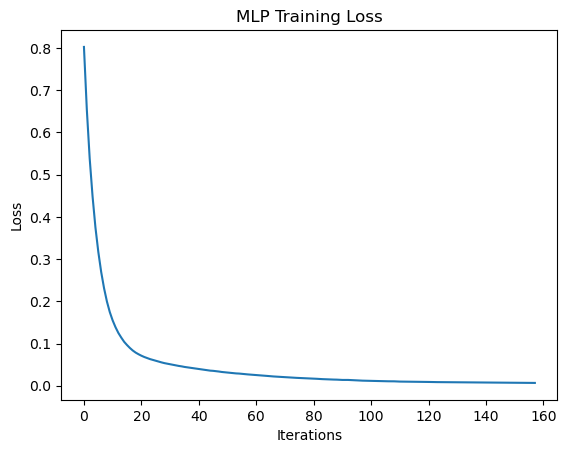

In [3]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                   alpha=0.01, max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_pred)
print(f"MLP Accuracy: {mlp_acc:.4f}")
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('MLP Training Loss')
plt.show()

## 2. Neural Network (Keras)

In [4]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/Users/ding/anaconda3/envs/dbba_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 14,337 (56.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4278 - loss: 0.7407 - val_accuracy: 0.9451 - val_loss: 0.4565
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9029 - loss: 0.4415 - val_accuracy: 0.9670 - val_loss: 0.2492
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9437 - loss: 0.2531 - val_accuracy: 0.9670 - val_loss: 0.1329
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9540 - loss: 0.1606 - val_accuracy: 0.9780 - val_loss: 0.0901
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9626 - loss: 0.1169 - val_accuracy: 0.9780 - val_loss: 0.0735
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9905 - loss: 0.0612 - val_accuracy: 0.9780 - val_loss: 0.0628
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9912 - loss: 0.0569 - val_accuracy: 0.9890 - val_loss: 0.0522
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9914 - loss: 0.0457 - val_accuracy: 0.9890 - v

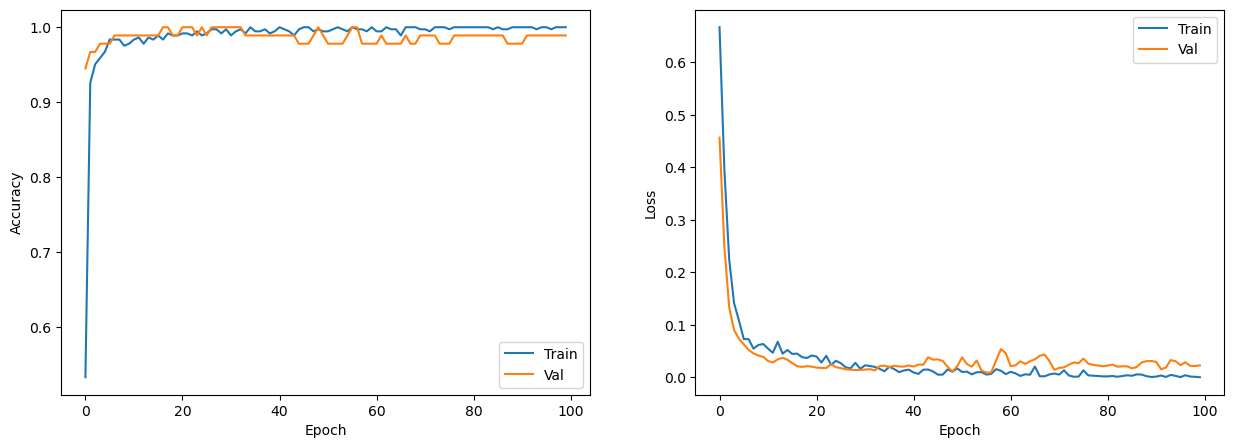

In [5]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100,
                    validation_split=0.2, verbose=1)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(history.history['accuracy'], label='Train')
ax1.plot(history.history['val_accuracy'], label='Val')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'], label='Train')
ax2.plot(history.history['val_loss'], label='Val')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
plt.show()

## Results Analysis

### 1. MLP (sklearn)
- The training loss curve decreases smoothly from around 0.8 to nearly 0.0, showing that the optimizer converges quickly.
- The final test accuracy is **0.9561**, which is strong but slightly lower than the Keras model.
- The curve does not show oscillations or divergence, suggesting the learning rate and regularization (`alpha=0.01`) are reasonable.

### 2. Keras Feed-Forward Network
- Training accuracy jumps above **0.90** after the first few epochs and reaches **~1.0** later, while validation accuracy quickly stabilizes around **0.98–1.0**.
- Both training and validation loss drop rapidly at the beginning and then flatten out at very low values, which indicates good convergence.
- The gap between training and validation curves stays small for most epochs, so there is **no strong overfitting**, although in later epochs the training loss is slightly lower than validation loss (a mild sign of overfitting).
- Dropout layers (0.3) and the relatively small network (128-64-32 units) help the model generalize well without memorizing the training set.

### 3. Comparison and Interpretation
- Both models perform well on this dataset, but the Keras model achieves **higher accuracy and lower loss** than the sklearn MLP.
- The fast convergence and stable validation metrics suggest that the chosen architecture, optimizer (Adam), and learning rate are appropriate for this binary classification task.
- In practice, we could stop training earlier (e.g., around 30–40 epochs) using **early stopping**, since performance plateaus and additional epochs bring little improvement.
